### Import some modules

In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

# Set up Camera access ###
Check possible device ids using: ```ls -ltrh /dev/video*```

In [2]:
cam = cv2.VideoCapture(1)

### Test camera access

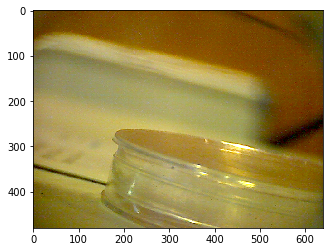

In [3]:
bgr_pic = [cam.read() for i in range(7)][-1]
b,g,r = cv2.split(bgr_pic[1])
rgb_pic = cv2.merge([r,g,b])
plt.imshow(rgb_pic)
plt.show()

# Start continuous picture acquisition

In [4]:
from modules.repeat_cam import repeat_cam as repeat

In [5]:
repeat(cam, period_minutes = 0.03, save_to = 'pictures')

A Jupyter Widget